In [1]:
import pandas as pd
import numpy as np
import datetime


from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### (1) 데이터 가져오기

In [2]:
df = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### (2) datetime 형변환, 컬럼 6가지 생성

In [3]:
df['datetime2'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime2'].dt.year
df['month'] = df['datetime2'].dt.month
df['day'] = df['datetime2'].dt.day
df['hour'] = df['datetime2'].dt.hour
df['minute'] = df['datetime2'].dt.minute
df['second'] = df['datetime2'].dt.second

In [4]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime2,year,month,day,hour,minute,second
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19 19:00:00,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19 20:00:00,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19 21:00:00,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19 22:00:00,2012,12,19,22,0,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012-12-19 23:00:00,2012,12,19,23,0,0


#### (3) 데이터 개수 시각화

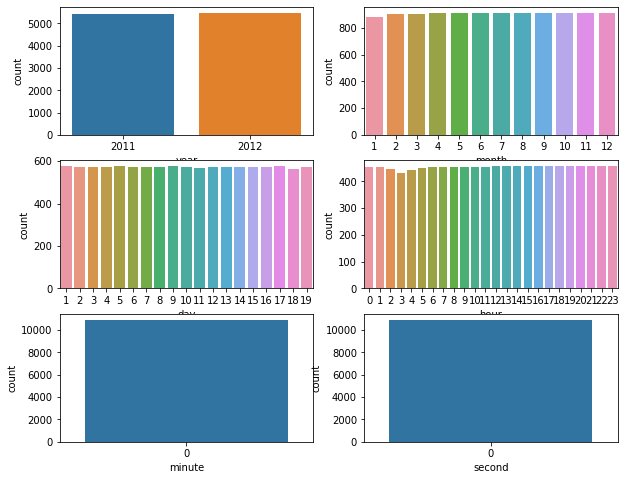

In [5]:
plt.figure(figsize=(10, 8))


plt.subplot(3,2,1)
sns.countplot(data=df, x='year')

plt.subplot(3,2,2)
sns.countplot(data=df, x='month')

plt.subplot(3,2,3)
sns.countplot(data=df, x='day')

plt.subplot(3,2,4)
sns.countplot(data=df, x='hour')

plt.subplot(3,2,5)
sns.countplot(data=df, x='minute')

plt.subplot(3,2,6)
sns.countplot(data=df, x='second')

plt.show()

In [6]:
df2 = df[['holiday', 'workingday','temp', 'humidity', 'registered', 'count', 'month', 'hour']]

In [7]:
X = df2[['holiday', 'workingday','temp', 'humidity', 'registered', 'month', 'hour']].to_numpy()
y = df2[['count']].to_numpy()

print(X)
print(y)

[[  0.     0.     9.84 ...  13.     1.     0.  ]
 [  0.     0.     9.02 ...  32.     1.     1.  ]
 [  0.     0.     9.02 ...  27.     1.     2.  ]
 ...
 [  0.     1.    13.94 ... 164.    12.    21.  ]
 [  0.     1.    13.94 ... 117.    12.    22.  ]
 [  0.     1.    13.12 ...  84.    12.    23.  ]]
[[ 16]
 [ 40]
 [ 32]
 ...
 [168]
 [129]
 [ 88]]


#### (4) train/test 분리 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8708, 7) (2178, 7) (8708, 1) (2178, 1)


#### (5) Linear Regression 모델학습

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### (6) 예측값 출력 및 손실함수 계산

In [10]:
predictions = model.predict(X_test)
predictions

array([[244.39624067],
       [240.54339309],
       [244.33640967],
       ...,
       [664.52312505],
       [494.10473873],
       [ 86.26280973]])

In [11]:
rmse = mean_squared_error(y_test, predictions) ** 0.5
rmse

33.83180360984041

#### (7) 시각화

In [12]:
X_test[:]

array([[  0.  ,   1.  ,  23.78, ..., 200.  ,   3.  ,  21.  ],
       [  0.  ,   1.  ,  27.06, ..., 209.  ,   6.  ,  16.  ],
       [  0.  ,   1.  ,  18.86, ..., 211.  ,   2.  ,  16.  ],
       ...,
       [  0.  ,   1.  ,  35.26, ..., 542.  ,   7.  ,  18.  ],
       [  0.  ,   1.  ,  17.22, ..., 437.  ,   2.  ,  17.  ],
       [  0.  ,   0.  ,  11.48, ...,  65.  ,  11.  ,   0.  ]])

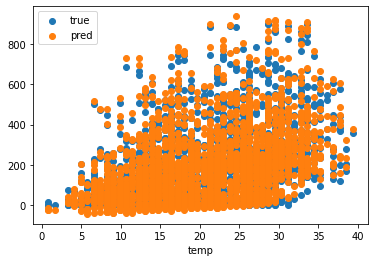

In [13]:
plt.scatter(X_test[:, 2], y_test, label="true") 
plt.scatter(X_test[:, 2], predictions, label="pred")
plt.xlabel('temp')
plt.legend()
plt.show()


# 숫자 바꿔서 대입 가능

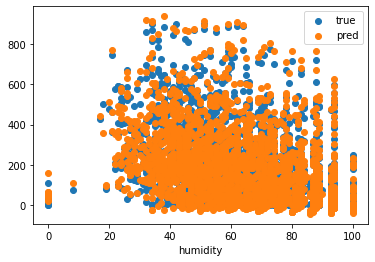

In [14]:
plt.scatter(X_test[:, 3], y_test, label="true")
plt.scatter(X_test[:, 3], predictions, label="pred")
plt.xlabel('humidity')
plt.legend()
plt.show()